# Fondamenti della probabilità: assiomi di Kolmogorov e sigma-algebra {#sec-prob-on-general-spaces}

**Prerequisiti**

- Leggi **Introduction to Probability** di Blitzstein e Hwang (2019). Focalizzati sui capitoli ...

**Concetti e competenze chiave**

**Preparazione del Notebook**

In [7]:
# Standard library imports
import os

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import scipy.stats as stats
from scipy.special import expit  # Funzione logistica
from cmdstanpy import cmdstan_path, CmdStanModel
import math
import random
from datetime import datetime
import calendar

# Configuration
seed = sum(map(ord, "stan_odds_ratio"))
rng = np.random.default_rng(seed=seed)
sns.set_theme(palette="colorblind")
az.style.use("arviz-darkgrid")
%config InlineBackend.figure_format = "retina"

# Define directories
home_directory = os.path.expanduser("~")
project_directory = f"{home_directory}/_repositories/psicometria"

# Print project directory to verify
print(f"Project directory: {project_directory}")

Project directory: /Users/corradocaudek/_repositories/psicometria


## Introduzione {.unnumbered}

Nel @sec-prob-spaces abbiamo introdotto la teoria della misura e della probabilità su insiemi con un numero finito di elementi. Tuttavia, molti degli spazi matematici che incontriamo nelle applicazioni pratiche, come gli interi e la retta reale, non hanno un numero finito di elementi, ma piuttosto un numero numerabile infinito o addirittura non numerabile infinito di elementi. Sfortunatamente, estendere la teoria della misura e della probabilità a spazi più generali come questi non è sempre semplice.

Senza entrare nei dettagli, è stato dimostrato che la forma più generale della teoria della misura e della probabilità applicabile a qualsiasi spazio matematico è chiamata $\sigma$-algebra. In questo capitolo, forniremo un'introduzione intuitiva ai vincoli delle $\sigma$-algebre ed esamineremo alcune notevoli applicazioni. In particolare, introdurremo i concetti di variabile casuale, funzioni di massa di probabilità e funzioni di ripartizione.

Questi concetti sono fondamentali per comprendere come la probabilità e la misura possono essere utilizzate in contesti più complessi, permettendo di estendere le nostre analisi a insiemi infiniti e spazi continui, che sono comuni nelle applicazioni psicologiche.

## $\sigma$-Algebra

Una **$\sigma$-algebra** è una struttura matematica che permette di definire in modo coerente quali sottoinsiemi di un insieme sono "misurabili". 

## Definizione di $\sigma$-Algebra

Una **$\sigma$-algebra** è una collezione di sottoinsiemi di uno spazio $X$ che soddisfa le seguenti proprietà:

- **Chiusura rispetto al complemento**: Se un sottoinsieme $A$ appartiene alla $\sigma$-algebra $\mathcal{F}$, allora anche il suo complemento $A^c$ appartiene a $\mathcal{F}$. Questo significa che se $\mathcal{F}$ contiene un certo sottoinsieme, deve contenere anche tutti gli elementi che non sono in quel sottoinsieme.

- **Chiusura rispetto alle unioni numerabili**: Se una sequenza numerabile di sottoinsiemi $A_1, A_2, A_3, \ldots$ appartiene alla $\sigma$-algebra $\mathcal{F}$, allora anche l'unione di tutti questi sottoinsiemi appartiene a $\mathcal{F}$. Questo implica che se $\mathcal{F}$ contiene una serie di sottoinsiemi, deve contenere anche il loro insieme unito.

- **Inclusione dello spazio campionario**: Lo spazio campionario $X$ stesso deve appartenere alla $\sigma$-algebra $\mathcal{F}$. In altre parole, l'intero insieme $X$ è considerato un sottoinsieme misurabile.

La *chiusura* in questo contesto significa che la collezione $\mathcal{F}$ è stabile rispetto a determinate operazioni insiemistiche. In particolare, se si applicano le operazioni di complemento o di unione numerabile a elementi della $\sigma$-algebra, i risultati di queste operazioni rimarranno all'interno della stessa $\sigma$-algebra. Questo garantisce che la $\sigma$-algebra non "perda" elementi a causa di queste operazioni, mantenendo così la coerenza e la completezza della collezione di sottoinsiemi.

### Spazio Misurabile

Un insieme dotato di una $\sigma$-algebra, $(X, \mathcal{X})$, è detto **spazio misurabile**. Gli elementi di una $\sigma$-algebra sono noti come **sottoinsiemi misurabili**, mentre i sottoinsiemi non appartenenti alla $\sigma$-algebra sono detti **non misurabili**. La distinzione tra sottoinsiemi misurabili e non misurabili è cruciale per evitare comportamenti anomali e controintuitivi nella teoria della misura e della probabilità.

## Gli Assiomi di Kolmogorov

I tre assiomi di Kolmogorov definiscono le proprietà fondamentali di una misura di probabilità e richiedono l'esistenza di una $\sigma$-algebra.

1. **Non negatività**: Per qualsiasi evento $A$ nello spazio campionario $\Omega$, la probabilità di $A$ è non negativa.
   $$
   P(A) \geq 0.
   $$

2. **Normalizzazione**: La probabilità dell'intero spazio campionario $\Omega$ è 1.
   $$
   P(\Omega) = 1.
   $$

3. **Additività numerabile**: Per qualsiasi sequenza numerabile di eventi mutuamente esclusivi $A_1, A_2, A_3, \ldots$, la probabilità della loro unione è la somma delle loro probabilità.
   $$
   P\left(\bigcup_{i=1}^{\infty} A_i\right) = \sum_{i=1}^{\infty} P(A_i).
   $$

### Connessione tra gli Assiomi di Kolmogorov e le $\sigma$-Algebre

Gli assiomi di Kolmogorov sono definiti rispetto a una misura di probabilità $P$ su uno spazio campionario $\Omega$ e implicano l'esistenza di una $\sigma$-algebra $\mathcal{F}$. La $\sigma$-algebra $\mathcal{F}$ è la collezione di eventi (sottoinsiemi di $\Omega$) per i quali la misura di probabilità $P$ è definita.

1. **Non negatività** garantisce che $P$ assegni un valore non negativo a ogni evento nella $\sigma$-algebra.
2. **Normalizzazione** garantisce che $P(\Omega) = 1$, assicurando che $\Omega$ sia un elemento della $\sigma$-algebra.
3. **Additività numerabile** garantisce che la $\sigma$-algebra sia chiusa rispetto alle unioni numerabili di insiemi disgiunti.

In sintesi, gli assiomi di Kolmogorov richiedono una $\sigma$-algebra come struttura all'interno della quale queste proprietà valgono. La $\sigma$-algebra è quindi la collezione di eventi per i quali la misura di probabilità è ben definita e coerente con gli assiomi di Kolmogorov.

## Probabilità

Una volta definiti gli assiomi di Kolmogorov, è possibile introdurre la definizione di probabilità.

La **probabilità** di un evento è una misura numerica che indica la possibilità che tale evento si verifichi, in accordo con gli assiomi di Kolmogorov.

- Se $P(A) = 0$, l'evento $A$ è impossibile.
- Se $P(A) = 1$, l'evento $A$ è certo.

Per denotare la probabilità che un evento $A$ non si verifichi, si usa la notazione $P(A^c)$, dove:
$$
P(A^c) = 1 - P(A).
$$

### Proprietà Derivate dagli Assiomi di Kolmogorov

Alcune proprietà importanti derivate dagli assiomi includono:

- $P(\varnothing) = 0$,
- Se $A \subset B$, allora $P(A) \leq P(B)$,
- $0 \leq P(A) \leq 1$,
- $P(A^c) = 1 - P(A)$,
- Se $A \cap B = \varnothing$, allora $P(A \cup B) = P(A) + P(B)$.

### Regole di Addizione per Eventi

Per eventi non mutuamente esclusivi, la probabilità della loro unione è data da:
$$
P(A \cup B) = P(A) + P(B) - P(A \cap B).
$$

Utilizzando il terzo assioma della probabilità, si ottiene:
$$
P(A \cup B) = P(A \cap B^c) + P(B \cap A^c) + P(A \cap B).
$$

Quando $A$ e $B$ sono mutuamente esclusivi, $P(A \cap B) = 0$, e quindi:
$$
P(A \cup B) = P(A) + P(B).
$$

La legge della probabilità totale permette di scrivere:
$$
P(A) = P(A \cap B) + P(A \cap B^c),
$$
e analogamente per $B$:
$$
P(B) = P(B \cap A) + P(B \cap A^c).
$$

In conclusione, gli assiomi di Kolmogorov forniscono la base per definire la probabilità su una $\sigma$-algebra, garantendo che le proprietà fondamentali della probabilità siano rispettate e che la probabilità sia ben definita per una collezione coerente di sottoinsiemi.

## Probabilità e Calcolo Combinatorio

I problemi scolastici più comuni sulle probabilità richiedono l'uso del calcolo combinatorio. La struttura generale di questi problemi è sempre la stessa: dobbiamo contare il numero di modi in cui un evento compatibile con l'evento di "successo" definito dal problema si realizza e poi trovare la proporzione di tali eventi rispetto a tutti gli eventi possibili (inclusi quelli di "insuccesso") che possono verificarsi nello spazio campionario. Questi problemi presentano due difficoltà principali:

1. Trasformare la descrizione verbale del problema in una formulazione matematica chiara, suddividendo gli eventi possibili nello spazio campionario in base alle condizioni di successo e insuccesso definite dal problema.
2. Contare il numero di successi e il numero totale di eventi.

Per risolvere questi problemi, dobbiamo utilizzare tecniche del calcolo combinatorio, come le permutazioni e le combinazioni, che ci permettono di contare in modo preciso il numero di possibilità.

Consideriamo un esempio semplice e intuitivo per chiarire il concetto. Supponiamo di avere una scatola con 10 palline numerate da 1 a 10. Vogliamo calcolare la probabilità di estrarre una pallina con un numero pari.

1. **Definizione degli eventi**: In questo caso, l'evento di "successo" è l'estrazione di una pallina con un numero pari.
   - Eventi di successo: {2, 4, 6, 8, 10}
   - Eventi totali: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

2. **Conteggio delle possibilità**:
   - Numero di eventi di successo: 5
   - Numero totale di eventi: 10

3. **Calcolo della probabilità**:
   $$
   P(\text{numero pari}) = \frac{\text{numero di eventi di successo}}{\text{numero totale di eventi}} = \frac{5}{10} = 0.5.
   $$

Per problemi più complessi, come il calcolo della probabilità di ottenere una determinata combinazione di carte da un mazzo o di formare un particolare gruppo di persone da una popolazione più grande, utilizziamo strumenti del calcolo combinatorio. 

## Il Problema dei Fratelli Bernoulli

La soluzione dei problemi di probabilità non è sempre semplice e nella storia della matematica ci sono molti esempi di celebri matematici che hanno commesso errori. Uno di questi aneddoti riguarda Jakob Bernoulli, uno dei pionieri della teoria della probabilità.

Jakob Bernoulli si interessò al calcolo delle probabilità mentre cercava di formalizzare le leggi del caso nel suo libro "Ars Conjectandi", pubblicato postumo nel 1713. Uno dei problemi che affrontò riguardava il calcolo della probabilità di ottenere almeno una testa in 8 lanci di una moneta equa. Nonostante il suo approccio iniziale fosse corretto, Bernoulli commise un errore nel calcolo combinatorio durante il processo.

Per risolvere il problema di calcolare la probabilità di ottenere almeno una testa in 8 lanci, bisogna considerare la probabilità complementare, ovvero la probabilità di non ottenere alcuna testa (ottenere solo croci) in 8 lanci, e poi sottrarla da 1:

1. **Calcolo della probabilità complementare**: La probabilità di ottenere solo croci in un singolo lancio è $\frac{1}{2}$. La probabilità di ottenere solo croci in 8 lanci consecutivi è:
   $$
   \left(\frac{1}{2}\right)^8 = \frac{1}{256}.
   $$

2. **Calcolo della probabilità di ottenere almeno una testa**:
   $$
   P(\text{almeno una testa}) = 1 - P(\text{nessuna testa}) = 1 - \frac{1}{256} = \frac{255}{256}.
   $$

Jakob Bernoulli commise un errore nel calcolo combinatorio che lo portò a una soluzione errata. Egli sottostimò la probabilità di ottenere almeno una testa, probabilmente a causa di un errore nel conteggio delle possibili combinazioni di successi e insuccessi.

Questo errore fu successivamente corretto da altri matematici, tra cui suo nipote Daniel Bernoulli, che dimostrarono il metodo corretto per risolvere tali problemi utilizzando il calcolo combinatorio in modo appropriato.

La storia del calcolo combinatorio e della probabilità è ricca di aneddoti, come quello di Jakob Bernoulli, che mettono in luce quanto i problemi di probabilità possano essere estremamente controintuitivi, persino per i grandi matematici. Oggi, grazie al lavoro e alle correzioni apportate dai matematici del passato, siamo in grado di risolvere molti di questi problemi con maggiore facilità. La teoria della probabilità, come molte altre discipline scientifiche, è il risultato di un lungo processo di sviluppo e comprensione, che ha richiesto tempo e sforzi considerevoli.

Una delle sfide della probabilità è che spesso i problemi non si prestano a soluzioni immediate o intuitive. Tuttavia, esistono due approcci fondamentali per affrontarli. Il primo consiste nell'applicare i teoremi della teoria della probabilità, un metodo che, come abbiamo visto, può risultare controintuitivo. Il secondo approccio è quello della simulazione Monte Carlo, che consente di ottenere una soluzione approssimata, ma molto vicina al valore reale, seguendo una procedura più intuitiva. Il nome di questo metodo deriva dal famoso Casinò di Monte Carlo a Monaco, ma possiamo semplicemente riferirci ad esso come metodo di simulazione.

La simulazione Monte Carlo è una classe generale di metodi stocastici, in contrasto con i metodi deterministici, utilizzati per risolvere approssimativamente problemi analitici attraverso la generazione casuale delle quantità di interesse. Tra i metodi comunemente utilizzati troviamo il campionamento con reinserimento, in cui la stessa unità può essere selezionata più volte, e il campionamento senza reinserimento, in cui ogni unità può essere selezionata una sola volta. Questi strumenti offrono un potente mezzo per affrontare problemi complessi in modo pratico e accessibile.

::: {#exm-}

Consideriamo il seguente esercizio che presenta un "classico" problema di calcolo delle probabilità.

"Un'urna contiene 10 palline rosse, 10 palline blu e 20 palline verdi. Se si estraggono 5 palline a caso senza reinserimento, qual è la probabilità che venga selezionata almeno una pallina di ciascun colore?"

La soluzione al problema consiste nel contare il numero di modi in cui possono verificarsi gli eventi incompatibili con la condizione richiesta, dividere per il numero totale di modi in cui 5 palline possono essere estratte da un'urna con 40 palline, e sottrarre tale risultato da 1.

Iniziamo dal denominatore ("in quanti modi possono essere estratte 5 palline da un'urna che ne contiene 40"). La soluzione è data dal coefficiente binomiale: $\binom{40}{5}$.

Dobbiamo poi enumerare tutti i casi incompatibili con la condizione espressa dal problema; al numeratore avremo quindi: (modi di ottenere nessuna pallina rossa) + (modi di ottenere nessuna pallina blu) + (modi di ottenere nessuna pallina verde) - (modi di ottenere nessuna pallina rossa o blu) - (modi di ottenere nessuna pallina rossa o verde) - (modi di ottenere nessuna pallina blu o verde).

La soluzione è dunque:

$$
P(\text{almeno una rossa, blu e verde}) = \frac{
\binom{30}{5} + \binom{30}{5} + \binom{20}{5} - \binom{20}{5} - \binom{10}{5} - \binom{10}{5}
}{\binom{40}{5}}.
$$

Svolgiamo i calcoli usando Python.

In [2]:
# Funzione per calcolare il coefficiente binomiale
def choose(n, k):
    return math.comb(n, k)


# Calcoli
no_red = choose(30, 5)
no_blue = choose(30, 5)
no_green = choose(20, 5)

# Modi per estrarre 5 palline senza ottenere due colori specifici
no_red_blue = choose(20, 5)
no_red_green = choose(10, 5)
no_blue_green = choose(10, 5)

# Modi totali per estrarre 5 palline in generale
total_ways = choose(40, 5)

# Probabilità di estrarre almeno 1 pallina di ciascun colore
prob_real = (
    1
    - (no_red + no_blue + no_green - no_red_blue - no_red_green - no_blue_green)
    / total_ways
)
prob_real

0.567622278148594

Lo stesso risultato si ottiene con una simulazione.

In [7]:
random.seed(12345)

# Creare un'urna con le palline
urn = ["red"] * 10 + ["blue"] * 10 + ["green"] * 20

# Numero di simulazioni
simulations = 100000

count = 0
for _ in range(simulations):
    # Estrarre 5 palline dall'urna
    draw = random.sample(urn, 5)

    # Verificare se c'è almeno una pallina di ogni colore (red, blue, green)
    if "red" in draw and "blue" in draw and "green" in draw:
        count += 1

# Calcolare la probabilità simulata
prob_simulated = count / simulations
prob_simulated

0.56767

:::

Il metodo di simulazione consente di risolvere problemi che implicano il calcolo delle probabilità relative a vari eventi generati dal lancio dei dadi.

::: {#exm-}

Nel caso del lancio di un dado, è facile calcolare la probabilità di ottenere un 1 o un 5. Questa probabilità è $\frac{2}{6}$. Tuttavia, quando lanciamo due dadi, la situazione si complica perché ci interessa ottenere almeno un 1 o un 5, e c'è la possibilità di ottenere entrambi. Invece di calcolare direttamente questa probabilità, possiamo considerare la probabilità di non ottenere né un 1 né un 5 e sottrarla da 1. Con 2 dadi, la probabilità di non ottenere né un 1 né un 5 è $\frac{4}{6}$ o $\frac{2}{3}$ per ogni dado. Per calcolare la probabilità congiunta, possiamo moltiplicare la probabilità per ciascun dado: $1 - (\frac{2}{3} \times \frac{2}{3}) = 0.555$. Questo significa che c'è il 55% di probabilità di ottenere almeno un 1 o un 5 quando si lanciano 2 dadi.

Invece di calcolare matematicamente la probabilità di ottenere almeno un 1 o un 5, possiamo utilizzare il metodo Monte Carlo, simulando un grande numero di lanci di dadi e ottenendo la risposta attraverso un approccio di forza bruta. Ecco il procedimento generale:

- Lancia 2 dadi per 100.000 volte (o per il numero di volte che preferisci).
- Conta quante volte appare almeno un 1 o un 5 in ciascun lancio.
- Dividi questo conteggio per 100.000. Questa sarà la probabilità.

In [9]:
# Numero di simulazioni
simulations = 100_000
success_count = 0

# Simulazione dei lanci
for _ in range(simulations):
    # Lancia due dadi
    dice_rolls = [random.randint(1, 6) for _ in range(2)]

    # Verifica se c'è almeno un 1 o un 5
    if 1 in dice_rolls or 5 in dice_rolls:
        success_count += 1

# Calcola la probabilità simulata
probability = success_count / simulations
print(f"La probabilità di ottenere almeno un 1 o un 5 è: {probability:.3f}")

La probabilità di ottenere almeno un 1 o un 5 è: 0.555


- Usiamo un ciclo `for` per simulare i lanci. In ogni iterazione, generiamo due numeri casuali tra 1 e 6, che rappresentano i risultati dei due dadi.
- Controlliamo se in ciascun lancio appare almeno un 1 o un 5. Se è così, incrementiamo il contatore `success_count`.
- Alla fine, la probabilità viene calcolata dividendo `success_count` per il numero totale di simulazioni, e poi stampiamo il risultato.

Questo approccio, basato sulla simulazione, permette di ottenere un'ottima approssimazione della probabilità in modo intuitivo, senza dover ricorrere a calcoli matematici complessi.

È facile cambiare la simulazione per consdierare il caso di un numero maggiore di dadi. Per esempio, per il caso del lancio di tre dadi, basta modificare il codice in modo che vengano lanciati tre dadi invece di due. Questo si ottiene cambiando `range(2)` in `range(3)` nel ciclo che genera i lanci dei dadi. Questa modifica consente di calcolare la probabilità di ottenere almeno un 1 o un 5 con tre dadi, utilizzando lo stesso approccio basato sulla simulazione.

Questo approccio basato sulla simulazione è anche al centro della statistica bayesiana moderna. Poiché il calcolo degli integrali complessi necessari per determinare le distribuzioni posteriori è estremamente difficile, possiamo impiegare processi di Markov Chain Monte Carlo (MCMC) per esplorare lo spazio plausibile della distribuzione posteriore, fino a raggiungere una convergenza su un valore stabile.

:::

::: {#exm-}

Il problema dei compleanni, generalmente attribuito a Richard von Mises, è un noto esempio controintuitivo di calcolo delle probabilità che utilizza il calcolo combinatorio, in particolare le permutazioni. Il problema chiede quanti individui sono necessari affinché la probabilità che almeno due persone abbiano lo stesso compleanno superi il 50%, assumendo che ogni giorno dell'anno sia ugualmente probabile come compleanno. Sorprendentemente, la risposta è solo 23 persone, molto meno di quanto la maggior parte delle persone immagina.

Per risolvere il problema dei compleanni utilizzando le permutazioni, consideriamo la seguente relazione:

$$
\begin{align*}
P(\text{almeno due persone hanno lo stesso compleanno}) &= \\
1 - P(\text{nessuno ha lo stesso compleanno}).
\end{align*}
$$

Questa uguaglianza è valida perché l'evento "nessuno ha lo stesso compleanno" è il complemento dell'evento "almeno due persone hanno lo stesso compleanno". Pertanto, dobbiamo calcolare la probabilità che nessuno abbia lo stesso compleanno.

Sia $k$ il numero di persone. Per calcolare la probabilità che nessuno abbia lo stesso compleanno, dobbiamo contare il numero di modi in cui $k$ persone possono avere compleanni diversi. Poiché ogni compleanno è ugualmente probabile, possiamo usare le permutazioni per contare il numero di modi in cui $k$ compleanni unici possono essere disposti su 365 giorni:

$$
365P_k = \frac{365!}{(365 - k)!}.
$$

Dividiamo questo numero per il numero totale di elementi nello spazio campionario, che è il numero totale di modi in cui $k$ compleanni possono essere disposti su 365 giorni:

$$
365^k.
$$

Quindi, la probabilità che nessuno abbia lo stesso compleanno è:

$$
P(\text{nessuno ha lo stesso compleanno}) = \frac{365P_k}{365^k} = \frac{365!}{365^k (365 - k)!}.
$$

Usando questa formula, la probabilità che almeno due persone abbiano lo stesso compleanno è:

$$
P(\text{almeno due persone hanno lo stesso compleanno}) = 1 - \frac{365!}{365^k (365 - k)!}.
$$

In sintesi, calcolando questa probabilità, si scopre che bastano solo 23 persone affinché la probabilità che almeno due di loro abbiano lo stesso compleanno superi il 50%, un risultato sorprendente rispetto all'intuizione comune.

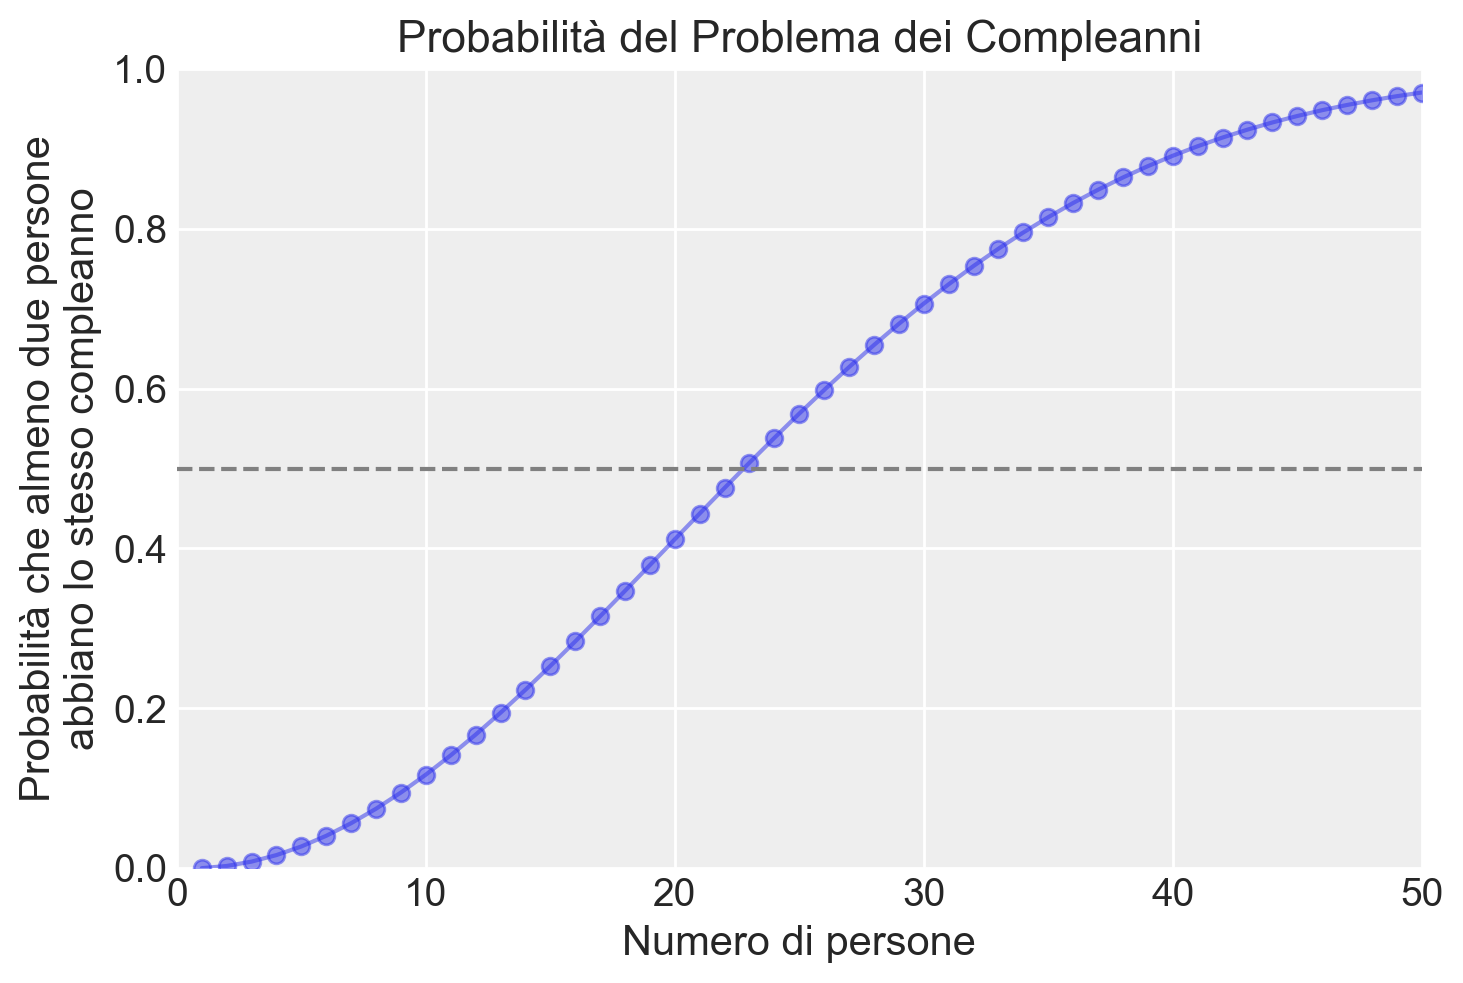

Probabilità per 20-25 persone: [0.41143838358049944, 0.44368833516523465, 0.47569530766240553, 0.507297234324024, 0.5383442579144757, 0.5686997039694264]


In [15]:
def birthday(k):
    logdenom = k * math.log(365) + math.lgamma(365 - k + 1) # log denominatore
    lognumer = math.lgamma(366) # log numeratore
    pr = 1 - np.exp(lognumer - logdenom) # trasformazione inversa
    return pr

k = np.arange(1, 51)
bday = [birthday(i) for i in k]

plt.plot(k, bday, marker="o", alpha=0.5)
plt.xlabel('Numero di persone')
plt.ylabel('Probabilità che almeno due persone\nabbiano lo stesso compleanno')
plt.axhline(
    y=0.5,
    linestyle="--",
    color="gray"
)
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.title('Probabilità del Problema dei Compleanni')
plt.show()

print("Probabilità per 20-25 persone:", bday[19:25])

Osserviamo che quando il numero di persone è 23, la probabilità che almeno due persone abbiano lo stesso compleanno supera 0.5. Quando il numero di persone è più di 50, questa probabilità è quasi 1.

:::

::: {#exm-}

In precedenza, abbiamo derivato la soluzione analitica esatta per il problema dei compleanni, ma possiamo ottenere una soluzione approssimata in modo più intuitivo utilizzando il metodo della simulazione Monte Carlo.

Per affrontare il problema dei compleanni, campioniamo $k$ compleanni, che potrebbero non essere unici, tra i 365 giorni dell'anno e verifichiamo se i $k$ compleanni campionati sono tutti diversi. Utilizziamo il campionamento con reinserimento, poiché ogni giorno dei 365 ha la stessa probabilità di essere scelto, indipendentemente dai giorni estratti in precedenza. In altre parole, il fatto che una persona sia nata in un determinato giorno dell'anno non esclude che qualcun altro possa essere nato nello stesso giorno.

Dopo aver ripetuto questa procedura di campionamento molte volte, calcoliamo la frazione di simulazioni in cui almeno due compleanni coincidono. Questa frazione serve come stima della probabilità cercata. Questa procedura di simulazione è intuitiva perché riproduce il processo di generazione dei dati descritto nel problema dei compleanni.

Per implementare il campionamento con o senza reinserimento in Python, utilizziamo la funzione `numpy.random.choice`. Nel caso del campionamento con reinserimento, impostiamo l'argomento `replace` su `True`. Il campionamento senza reinserimento significa che, una volta campionato un elemento, questo non sarà disponibile per estrazioni successive.

In [10]:
k = 23  # numero di persone
sims = 1000  # numero di simulazioni
event = 0  # contatore eventi

for _ in range(sims):
    days = np.random.choice(365, k, replace=True)
    unique_days = np.unique(days)
    if len(unique_days) < k:
        event += 1

# frazione di prove in cui almeno due compleanni sono uguali
answer = event / sims
print(f"Stima della probabilità: {answer}")

# Aumentare il numero di simulazioni a un milione per maggiore accuratezza
sims_large = 1000000
event_large = 0

for _ in range(sims_large):
    days = np.random.choice(365, k, replace=True)
    unique_days = np.unique(days)
    if len(unique_days) < k:
        event_large += 1

answer_large = event_large / sims_large
print(f"Stima con un milione di simulazioni: {answer_large}")

Stima della probabilità: 0.507
Stima con un milione di simulazioni: 0.507865


Nel codice sopra, abbiamo impostato il numero di simulazioni a un milione. Osserviamo che quando il numero di persone è 23, la probabilità che almeno due persone abbiano lo stesso compleanno è superiore a 0.5. Quando il numero di persone supera 50, questa probabilità è vicina a 1.

:::

## Le Assunzioni nella Soluzione dei Problemi 

Nella realtà, i compleanni non seguono una distribuzione uniforme. Una soluzione migliore al problema dei compleanni sarebbe quella di estrarre i compleanni dalla distribuzione effettiva piuttosto che da una distribuzione uniforme in cui ogni giorno ha la stessa probabilità. Non esiste un metodo matematico standard per calcolare questa probabilità; l'unico modo per farlo è attraverso la simulazione.

Negli Stati Uniti, il CDC e la Social Security Administration monitorano il numero di nascite giornaliere. Nel 2016, [FiveThirtyEight](https://projects.fivethirtyeight.com/polls/) ha pubblicato un articolo sulle frequenze giornaliere di nascita e ha reso disponibili i dati in un file CSV su GitHub. Utilizzando il codice fornito da [Andrew Heiss](https://www.andrewheiss.com/blog/2024/05/03/birthday-spans-simulation-sans-math/), possiamo caricare quei dati e calcolare le probabilità giornaliere dei compleanni negli Stati Uniti.

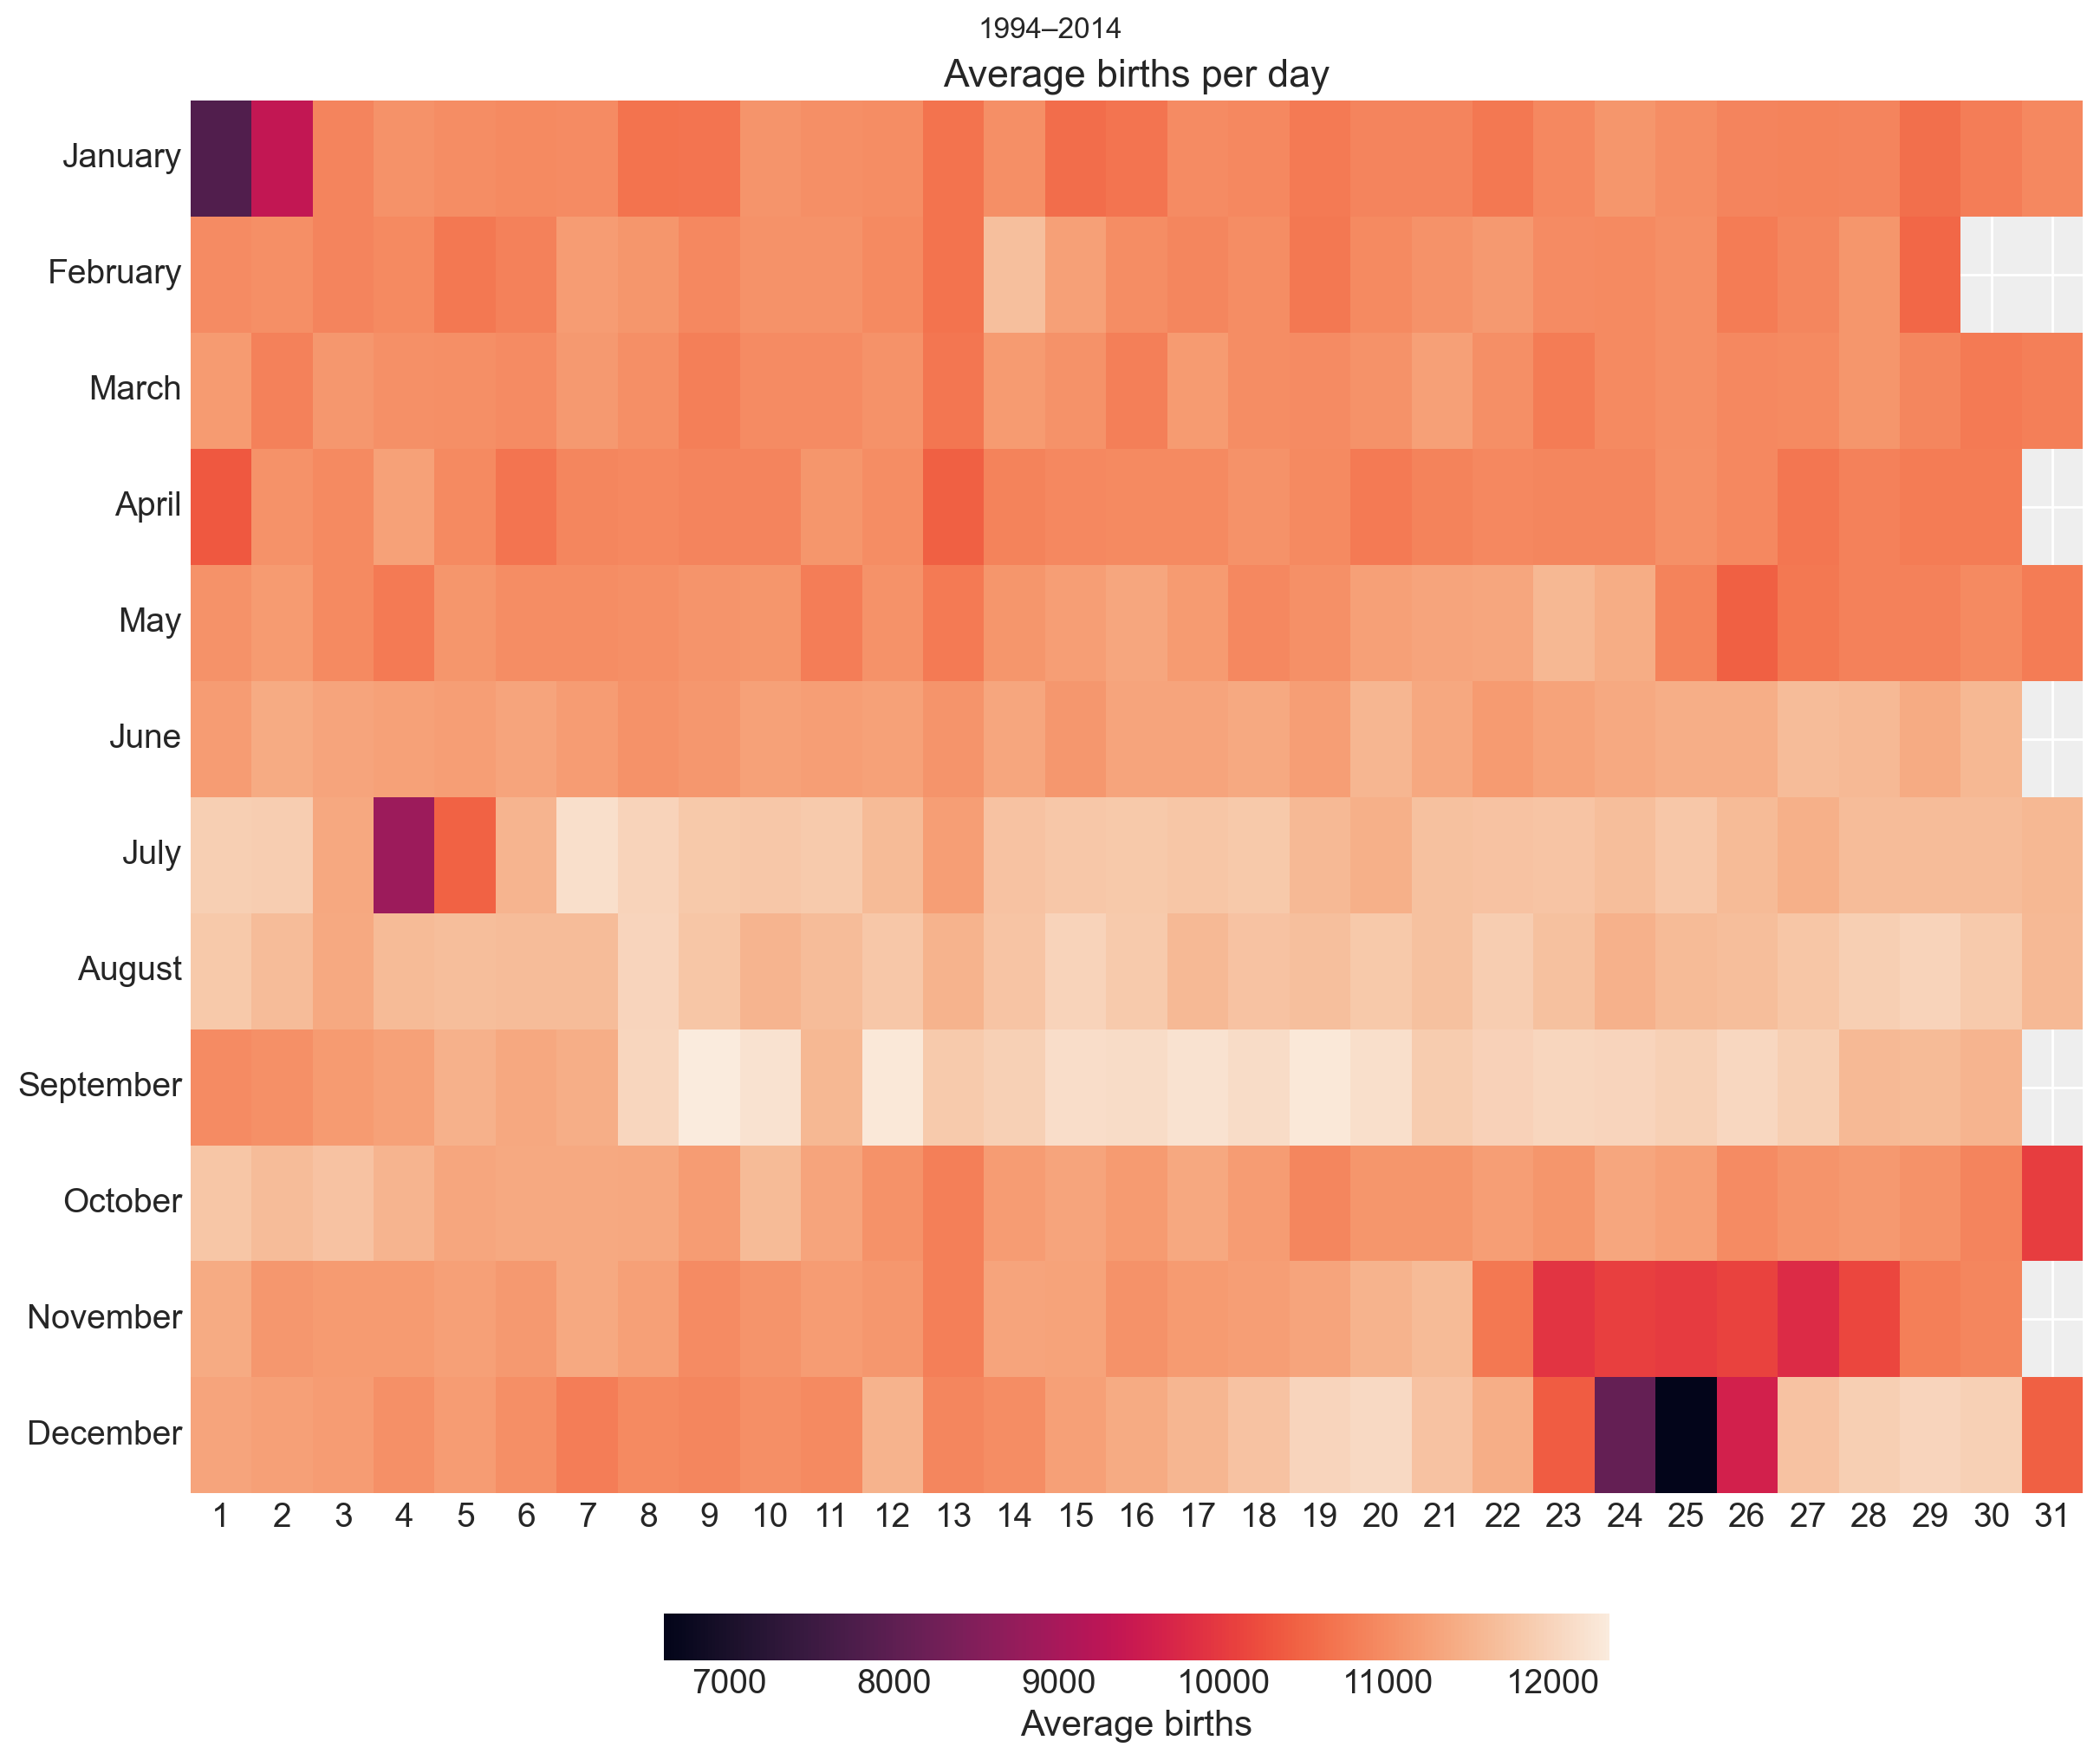

In [8]:
# Leggi i dati
births_1994_1999 = pd.read_csv(
    "https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_1994-2003_CDC_NCHS.csv"
)
births_1994_1999 = births_1994_1999[births_1994_1999["year"] < 2000]

births_2000_2014 = pd.read_csv(
    "https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-2014_SSA.csv"
)

# Unisci i dataset
births_combined = pd.concat([births_1994_1999, births_2000_2014])

# Crea la colonna 'full_date' con un anno fittizio 2024 per mantenere la corretta relazione giorno/mese
births_combined["full_date"] = pd.to_datetime(
    {
        "year": 2024,
        "month": births_combined["month"],
        "day": births_combined["date_of_month"],
    }
)

# Aggiungi la colonna 'day_of_year' per la verifica (non necessaria per la visualizzazione)
births_combined["day_of_year"] = births_combined["full_date"].dt.dayofyear

# Crea la colonna 'month_categorical' per avere il nome completo del mese
births_combined["month_categorical"] = births_combined["full_date"].dt.month_name()

# Calcola la media delle nascite per ciascun giorno del mese per ogni mese
avg_births_month_day = (
    births_combined.groupby(["month_categorical", "date_of_month"])
    .agg(avg_births=("births", "mean"))
    .reset_index()
)

# Correggi l'ordine dei mesi per l'asse Y
avg_births_month_day["month_categorical"] = pd.Categorical(
    avg_births_month_day["month_categorical"],
    categories=list(calendar.month_name)[1:],
    ordered=True,
)

# Visualizza i dati con un heatmap
plt.figure(figsize=(12, 10))
avg_births_pivot = avg_births_month_day.pivot(
    index="month_categorical", columns="date_of_month", values="avg_births"
)

sns.heatmap(
    avg_births_pivot,
    cmap="rocket",
    cbar_kws={"orientation": "horizontal", "shrink": 0.5, "label": "Average births"},
)

# Configura l'asse delle y per mostrare i mesi in ordine corretto
plt.yticks(rotation=0)
plt.title("Average births per day", fontsize=16)
plt.suptitle("1994–2014", fontsize=12)
plt.xlabel("")
plt.ylabel("")

# Mostra il grafico
plt.show()

Si noti che i dati rivelano alcuni pattern evidenti:

- Nessuno sembra voler avere figli durante le festività di Natale o Capodanno. Il giorno di Natale, la vigilia di Natale e il giorno di Capodanno presentano il numero medio di nascite più basso.
- Anche la vigilia di Capodanno, Halloween, il 4 luglio, il 1° aprile e l'intera settimana del Ringraziamento mostrano medie particolarmente basse.
- Il 13 di ogni mese registra leggermente meno nascite rispetto alla media—la colonna relativa al giorno 13 è particolarmente evidente in questo contesto.
- I giorni con il numero medio di nascite più alto si trovano a metà settembre, dal 9 al 20, ad eccezione dell'11 settembre.

Immagino che in Italia i pattern siano, almeno in parte, diversi.

Non è l'obiettivo qui riformulare la soluzione del problema dei compleanni utilizzando la distribuzione effettiva delle nascite piuttosto che quella uniforme, ma piuttosto sottolineare che le procedure di risoluzione dei problemi si basano su assunzioni—nel caso del problema dei compleanni, l'assunzione che la distribuzione dei compleanni sia uniforme, quando in realtà non lo è. Le soluzioni che otteniamo nei problemi probabilistici descrivono le regolarità osservabili nel mondo empirico tanto meglio quanto più sono ragionevoli le assunzioni formulate.

In tutti i modelli probabilistici (e quindi, in tutti i modelli scientifici, dato che esistono solo modelli probabilistici) è fondamentale prestare particolare attenzione alla plausibilità delle assunzioni su cui tali modelli si basano.

## Commenti e considerazioni finali

La teoria delle probabilità è un pilastro fondamentale della statistica, con applicazioni pratiche in numerosi campi, tra cui la psicologia. Comprendere le probabilità ci consente di prendere decisioni informate in situazioni di incertezza e di formulare previsioni affidabili. Una solida conoscenza delle basi della probabilità ci permette di affrontare una vasta gamma di problemi e di fare scelte ponderate basate sulla probabilità dei vari esiti possibili. Tuttavia, è importante ricordare che i modelli probabilistici sono solo approssimazioni della realtà e possono essere influenzati da semplificazioni o dalle limitazioni dei dati disponibili. Pertanto, è fondamentale interpretare i risultati con cautela e avere piena consapevolezza delle assunzioni che sottendono le analisi.

## Esercizi

::: {#exr-prob-on-general-spaces-1}

Supponiamo di dover formare una commissione di 5 psicologi su un gruppo di 20 persone (10 psicologi clinici e 10 psicologi del lavoro). Qual è la probabilità che almeno 2 psicologi clinici siano nella commissione? Risolvi il problema usando una simulazione Monte Carlo.

:::

## Informazioni sull'Ambiente di Sviluppo

In [7]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Fri Aug 02 2024

Python implementation: CPython
Python version       : 3.12.4
IPython version      : 8.26.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

pandas    : 2.2.2
arviz     : 0.18.0
seaborn   : 0.13.2
matplotlib: 3.9.1
numpy     : 1.26.4
scipy     : 1.14.0

Watermark: 2.4.3

